## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 



# Zip code metadata Visualization

In order to assess neighborhood socioeconomic status by zip code, utilize publicly available JENI data.

#### Source: 

#### https://data.lacounty.gov/datasets/lacounty::justice-equity-need-index-zip-code/about

 

## Prerequisite: 5_zip_eda.ipynb

In [ ]:
# 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats


In [2]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [6]:
#this is generated at enf of 1_eda.ipynb
# it has some features added for dates and close time in days
#write to file with new features added for next notebook: visualization
df = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_zip_ftr_eng_1.csv', low_memory=False)
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Area_y,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,476404.567383,2824.807047,1.0,0,2,0.039295,0.054729,90063.0,High,4.0


In [7]:
df.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS',
       ...
       'Shape__Area_y', 'Shape__Length_y', 'close_time_bins', 'is_county_ind',
       'park_distance_bins', 'closed_days_scaled', 'park_distance_scaled',
       'ZIP Code', 'JENI Need Tier', 'JENI_TIER'],
      dtype='object', length=154)

<Axes: xlabel='JENI_TIER'>

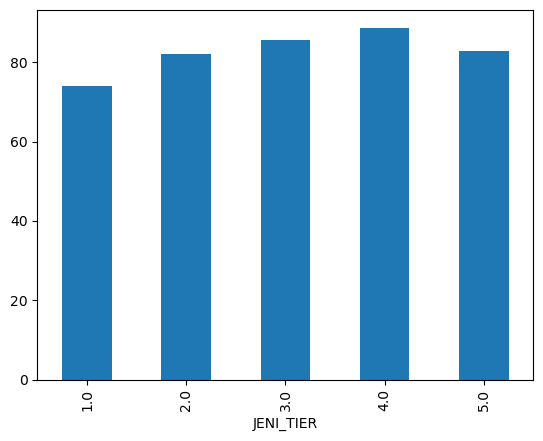

In [14]:
#plt.figure(figsize=(5, 3))
df.groupby("JENI_TIER")["close_time_days_x"].mean().plot( kind="bar")


In [13]:
df.groupby("JENI_TIER")["close_time_days_x"].mean()

JENI_TIER
1.0    73.898469
2.0    82.202872
3.0    85.658795
4.0    88.741403
5.0    82.783846
Name: close_time_days_x, dtype: float64

<Axes: title={'center': 'close_time_days_x'}, xlabel='JENI_TIER'>

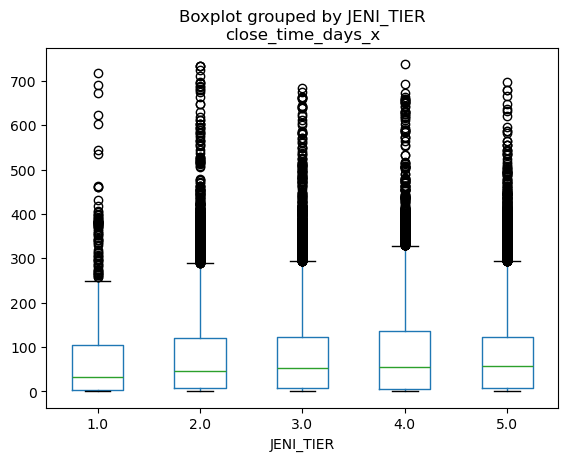

In [18]:
df.boxplot(by ='JENI_TIER', column =['close_time_days_x'], grid = False) 


<Axes: title={'center': 'close_time_days_x'}, xlabel='JENI_TIER'>

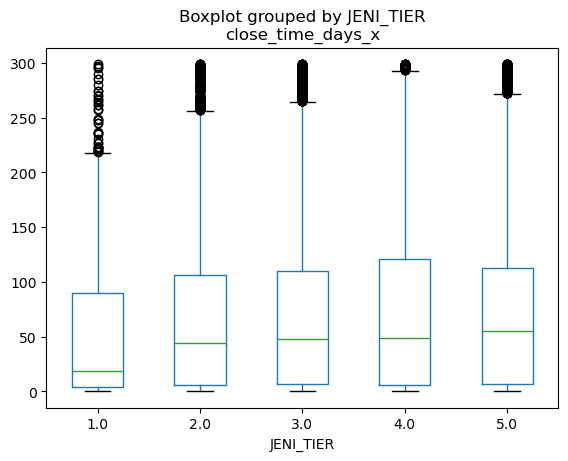

In [19]:
#remove some outliers
df[df["close_time_days_x"]<300].boxplot(by ='JENI_TIER', column =['close_time_days_x'], grid = False) 


<Axes: title={'center': 'close_time_days_x'}, xlabel='JENI_TIER'>

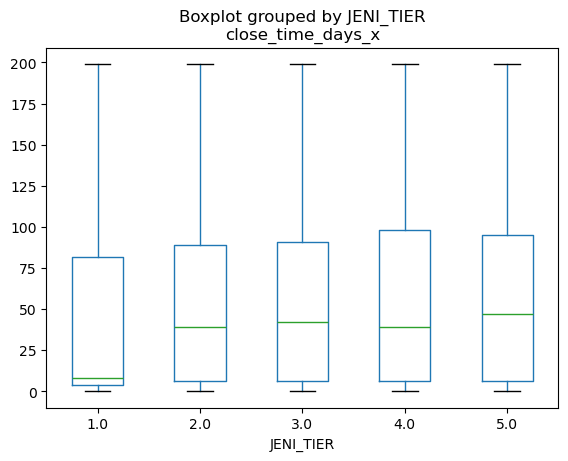

In [20]:
#remove more outliers
df[df["close_time_days_x"]<200].boxplot(by ='JENI_TIER', column =['close_time_days_x'], grid = False) 


In [21]:
df.groupby("JENI_TIER")["close_time_days_x"].median()

JENI_TIER
1.0    32.0
2.0    47.0
3.0    53.0
4.0    54.0
5.0    58.0
Name: close_time_days_x, dtype: float64

In [22]:
df[df["close_time_days_x"]<200].groupby("JENI_TIER")["close_time_days_x"].median()

JENI_TIER
1.0     8.0
2.0    39.0
3.0    42.0
4.0    39.0
5.0    47.0
Name: close_time_days_x, dtype: float64

In [23]:
df[df["close_time_days_x"]<200].groupby("JENI_TIER")["close_time_days_x"].mean()

JENI_TIER
1.0    47.930543
2.0    53.838853
3.0    56.463800
4.0    56.566579
5.0    58.579604
Name: close_time_days_x, dtype: float64